In [24]:
import pandas as pd
dataset = pd.read_csv('G:/Fynlab_project/bp_dataset.csv')

In [25]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
import numpy as np
from numpy.linalg import norm

class Kmeans:
    '''Implementing Kmeans algo'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def first_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_id = np.random.permutation(X.shape[0])
        centroids = X[random_id[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.first_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        old_centroids = self.centroids#to define old within function
        distance = self.compute_distance(X, old_centroids)
        return self.closest_cluster(distance)


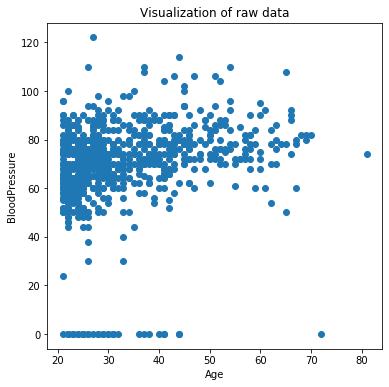

In [8]:
import matplotlib.pyplot as plt
df_copy = dataset
# Plot the data
plt.figure(figsize=(6, 6))
X = df_copy['Age']
y = df_copy['BloodPressure']
plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Visualization of raw data');
#use a subset of the data to start k-means exploration
data = df_copy[['Age', 'BloodPressure']]

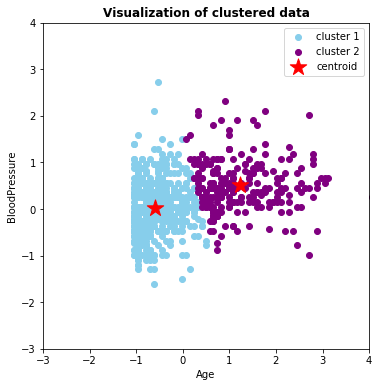

In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)
# Run local implementation of kmeans Here we tested 3 clusters
km = Kmeans(n_clusters=3, max_iter=100, random_state = 42)
km.fit(X_std)
centroids = km.centroids
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='skyblue', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='purple', label='cluster 2')
# plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
#             c='green', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

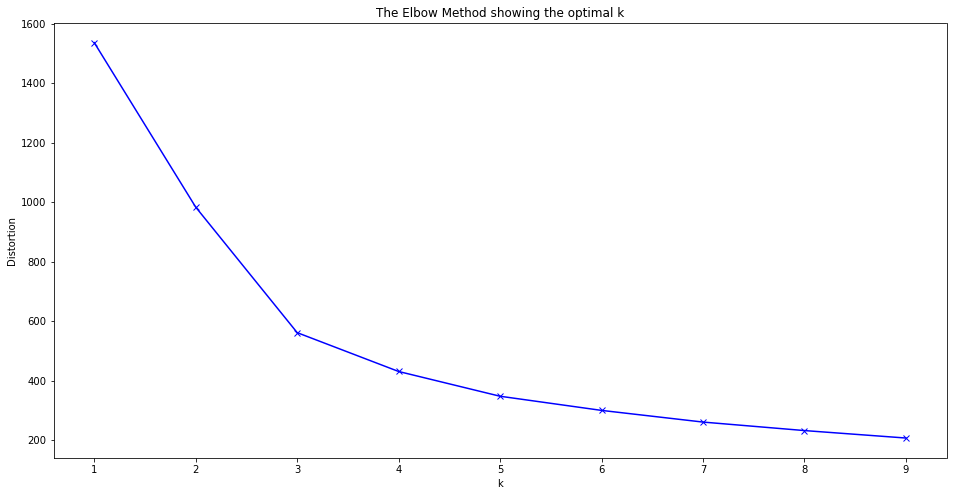

In [22]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_std)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

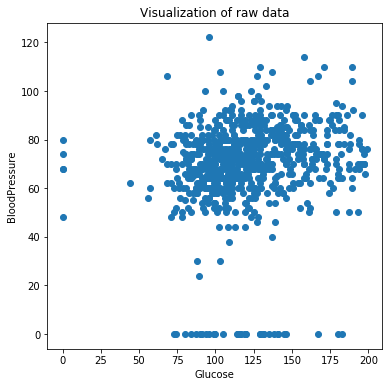

In [17]:
df_copy = dataset
# Plot the data
plt.figure(figsize=(6, 6))
X = df_copy['Glucose']
y = df_copy['BloodPressure']
plt.scatter(X, y)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Visualization of raw data');
#use a subset of the data to start k-means exploration
data = df_copy[['Glucose', 'BloodPressure']]

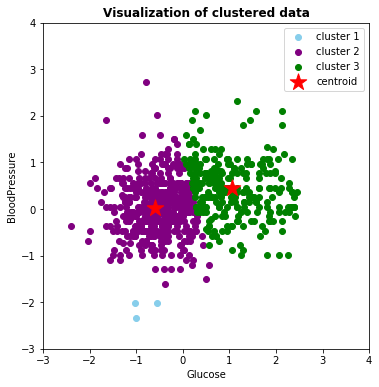

In [21]:

# Run local implementation of kmeans Here we tested 3 clusters
km = Kmeans(n_clusters=3, max_iter=100, random_state = 42)
km.fit(X_std)
centroids = km.centroids
# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='skyblue', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='purple', label='cluster 2')
plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='green', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');